In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.shape

(23, 2)

In [5]:
# Independent and Dependent
X = df[["Weight"]] # Independent should be 2D
y = df["Height"] # Dependent should be 1D

In [6]:
np.array(X).shape

(23, 1)

In [7]:
np.array(y).shape

(23,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.25) # You will split your model 4 part (test_size split Test to: 25%, Train to: 75%)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler minimazied your data. Example: 1000, 10, 150 very different data, but with SS you can change it 0.3, 1, 1.6

In [11]:
X_train = scaler.fit_transform(X_train) # Train should be fit But only TRAIN!!!
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs= -1) # -1 It allows the model to run in parallel on multi-core processors.

regression.fit(X_train, y_train)

print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


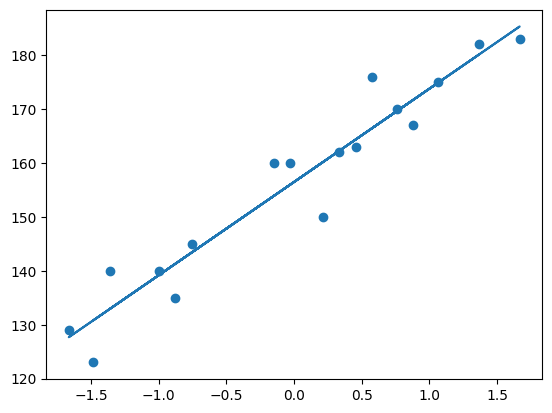

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [14]:
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print(mse) 
print(mae) 
print(rmse)
print(r2score)

114.84069295228699
9.66512588679501
10.716374991212605
0.7360826717981276


In [ ]:
%pip install statsmodels

In [17]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
prediction = model.predict(X_test_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.15e-09
Time:                        22:47:38   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.310    119.477      0.0

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
print("Final of my Project")